In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
import pandas as pd


In [3]:
file = pd.read_csv("/Users/aditijain/Desktop/NewFolderWithItems/facebook-v-predicting-check-ins/train.csv")
file.head()



,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


In [4]:
for col in file.columns:
    print(col)



row_id
x
y
accuracy
time
place_id


In [5]:

x_train = np.array(file.values[:,0:-1])
print(x_train[0:4])


[[0.00000e+00 7.94100e-01 9.08090e+00 5.40000e+01 4.70702e+05]
 [1.00000e+00 5.95670e+00 4.79680e+00 1.30000e+01 1.86555e+05]
 [2.00000e+00 8.30780e+00 7.04070e+00 7.40000e+01 3.22648e+05]
 [3.00000e+00 7.36650e+00 2.51650e+00 6.50000e+01 7.04587e+05]]


In [6]:
x_train.shape

(29118021, 5)

In [7]:
x=x_train.reshape(-4,1)

In [8]:
y_train = np.array(file.values[:,-1])
print(y_train[0:4])


[8.52306562e+09 1.75772671e+09 1.13753724e+09 6.56739324e+09]


In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_train


array([[-1.73205075, -1.47174853,  1.4126682 , -0.25140462,  0.23225422],
       [-1.73205063,  0.33487188, -0.07100038, -0.60869758, -0.99688213],
       [-1.73205051,  1.157625  ,  0.70610658, -0.07711537, -0.40818384],
       ...,
       [ 1.73205051, -0.70005223,  0.47313726, -0.13811661,  1.38745993],
       [ 1.73205063, -0.32757193,  1.0404437 , -0.11197322,  1.50519267],
       [ 1.73205075,  0.85824799, -1.00942309, -0.57383973, -1.35899994]])

In [10]:
f = lambda x: x % 23 
g=lambda x: x%2


In [11]:
y_train=f(y_train)

y_train[0:4]


array([15., 13., 15.,  8.])

In [12]:
y_train=g(y_train)

y_train[0:4]

array([1., 1., 1., 0.])

In [134]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict_proba(x_train)
        pred=pred[:,1]
        pred=pred.reshape(-1,1)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1
    
    def predict(self,x):
        initpred = self.model.predict_proba(x)
        initpred=initpred[:,1]
        initpred=initpred.reshape(-1,1)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(bf.size-1))]
        pred = []
        for i in indexes:
            pred += [self.bit_array[i]]
        return np.array(pred)

#(Input:bloom filter,number array,ratio; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,x,y):
    pred = bf.predict(x)
    pred=pred.reshape(-1,1)
    tn, fp, fn, tp = confusion_matrix(y, pred,labels=[False,True]).ravel() 
    return fp/(fp+tn)

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k


def fpr_test(x,bf,y):
    pred=bf.predict(x)
    fp=0
    tn=0
    for i in range(len(pred)):
        if((pred[i]==1)and(y[i]==0)):
            fp+=1
        if((pred[i]==0) and (y[i]==0)):
            tn+=1
        if((pred[i]==0) and (y[i]==1)):
            return -1
    print(fp)
    print(tn)
    return fp/(fp+tn)
#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

# Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=10.0,random_state = 10,max_iter=100)
classifier.fit(x_train, y_train)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred=classifier.predict(x_train)

In [16]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_train, y_pred))

Accuracy :  0.5208020490128776


In [17]:
prob=classifier.predict_proba(x_train)


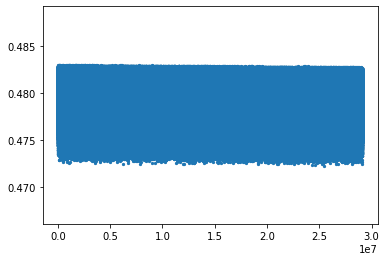

In [18]:
preds=prob[:,1]
plt.scatter(np.arange(len(preds)), preds, s=5)

In [146]:
m=200

In [147]:
bf=BloomFilter(m,classifier)

In [148]:
y=y_train.reshape(-1,1)

In [149]:
bf.add_init(x_train,y_train)

In [150]:
print(fpr_test(x_train,bf,y_train))

32
106
0.2318840579710145


In [26]:
from sklearn import svm
from sklearn.metrics import accuracy_score 


In [107]:
clf2 = svm.SVC(kernel='rbf',probability=True)
clf2.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [108]:
preds=clf2.predict(x_train)

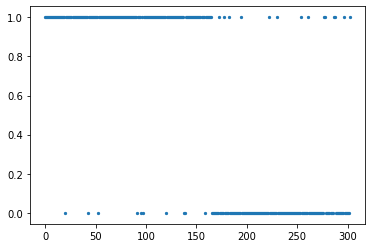

In [109]:
plt.scatter(np.arange(len(preds)), preds, s=5)

In [110]:
accuracy = accuracy_score(y_train.flatten(),preds)
print(accuracy)

0.9207920792079208


In [111]:
probability=clf2.predict_proba(x_train)
print(probability[:,1])
print(probability.shape)

[0.83795377 0.7054494  0.94193357 0.96510545 0.87031253 0.8703918
 0.90654886 0.80822976 0.87028628 0.90203127 0.87025151 0.97228329
 0.96518511 0.87024747 0.93992695 0.93607994 0.97653213 0.79205582
 0.84592717 0.87039721 0.28057601 0.97103662 0.92080149 0.57513552
 0.87028168 0.87033969 0.91782979 0.87029611 0.87037812 0.87030899
 0.92465935 0.67424742 0.94418714 0.72137418 0.81067721 0.8703144
 0.96236024 0.58085224 0.95796963 0.89996476 0.88274992 0.92518004
 0.37081981 0.90488087 0.92574193 0.95428396 0.96118994 0.92964172
 0.87022805 0.94046581 0.97695559 0.74408183 0.14314417 0.91433841
 0.97219324 0.81314976 0.87032787 0.86493451 0.92627296 0.87032407
 0.87027957 0.8129524  0.92062381 0.87027666 0.95694436 0.87703941
 0.87030854 0.9554127  0.96803519 0.96955733 0.57523914 0.86306028
 0.8823408  0.83206425 0.96404477 0.91647522 0.87036082 0.87022937
 0.95829811 0.81399804 0.97552878 0.91175968 0.96238059 0.87023793
 0.85558956 0.87035609 0.68189413 0.87025747 0.93639439 0.870256

In [112]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


In [46]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(clf2, param_grid=param_grid, cv=cv)
grid.fit(x_train, y_train)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [47]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


The best parameters are {'C': 100000000.0, 'gamma': 1e-08} with a score of 0.84


In [121]:
m=200
bf=BloomFilter(m,clf2)
bf.add_init(x_train,y_train)

In [122]:
print(fpr_test(x_train,bf,y_train))

13
125
0.09420289855072464


In [115]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.